 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path('../Resources/whale_returns.csv')
# YOUR CODE HERE
whale_returns_df = pd.read_csv(whale_returns_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
# YOUR CODE HERE
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
# YOUR CODE HERE
whale_returns_df = whale_returns_df.dropna()
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("../Resources/algo_returns.csv")
# YOUR CODE HERE
algo_returns_df = pd.read_csv(algo_returns_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
# YOUR CODE HERE
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
# YOUR CODE HERE
algo_returns_df = algo_returns_df.dropna()
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("../Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_history_df = pd.read_csv(sp500_history_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
sp500_history_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [9]:
# Check Data Types
# YOUR CODE HERE
sp500_history_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
# YOUR CODE HERE
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$', '').astype('float')
sp500_history_df.dtypes

Close    float64
dtype: object

In [11]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_daily_returns = sp500_history_df.pct_change()
sp500_daily_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [12]:
# Drop nulls
# YOUR CODE HERE
sp500_daily_returns = sp500_daily_returns.dropna()
sp500_daily_returns.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [13]:
# Rename Column
# YOUR CODE HERE
sp500_daily_returns = sp500_daily_returns.rename(columns={
    'Close': 'S&P 500',
})

sp500_daily_returns.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
concat_returns_df = pd.concat([whale_returns_df,algo_returns_df,sp500_daily_returns],axis='columns',join='inner')
concat_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

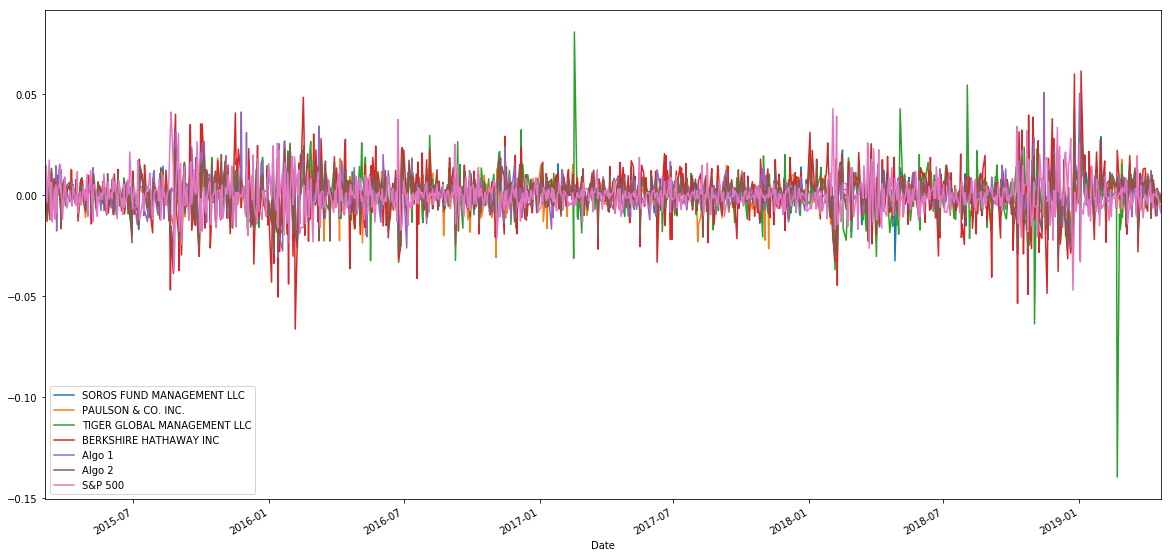

In [15]:
# Plot daily returns
# YOUR CODE HERE
chart_axes = concat_returns_df.plot(figsize=(20,10))

chart_axes.legend(['SOROS FUND MANAGEMENT LLC', 
            'PAULSON & CO. INC.', 
            'TIGER GLOBAL MANAGEMENT LLC', 
            'BERKSHIRE HATHAWAY INC',
            'Algo 1',
            'Algo 2',
            'S&P 500'])

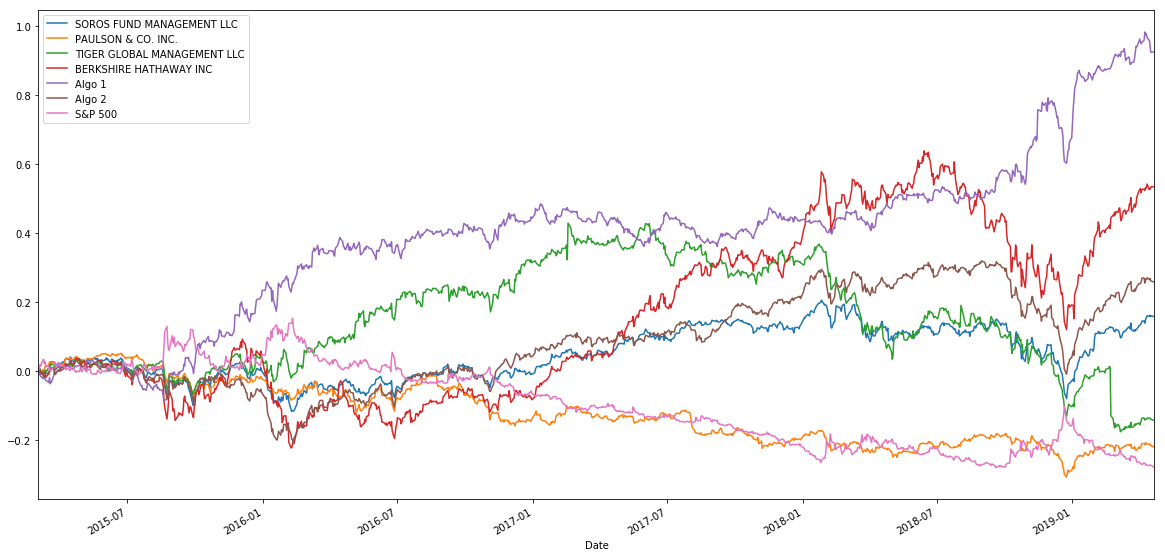

In [16]:
# Plot cumulative returns
# YOUR CODE HERE
concat_cumulative = (1 + concat_returns_df).cumprod() - 1

chart_axes = concat_cumulative.plot(figsize=(20,10))

chart_axes.legend(['SOROS FUND MANAGEMENT LLC', 
            'PAULSON & CO. INC.', 
            'TIGER GLOBAL MANAGEMENT LLC', 
            'BERKSHIRE HATHAWAY INC',
            'Algo 1',
            'Algo 2',
            'S&P 500'])

Does any portfolio outperform the S&P 500?

From the daily returns plot and the cumulative returns plot, it appears that every portfolio outperformed the S&P 500.

---

## Performance by Month and Year

Analyze the performance by Month and Year:

1. Calculate the Annual Returns
2. Sort the 2017 portfolio returns in descending order to determine the best portfolios for 2017
3. Calculate the Monthly Returns
4. Sort in descending order, the porfolio returns for December 2018

In [ ]:
# Returns by Year
# YOUR CODE HERE

In [ ]:
# Top Portfolio returns for 2017
# YOUR CODE HERE

In [ ]:
# Returns by Month
# YOUR CODE HERE

In [ ]:
# Top Portfolio Returns for December 2018
# YOUR CODE HERE

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

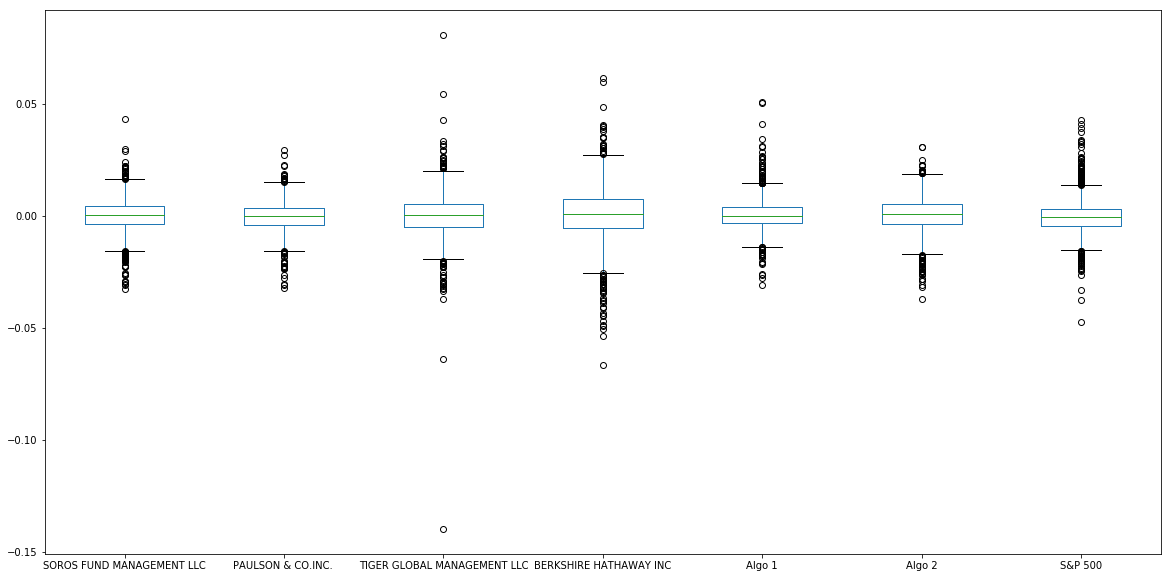

In [17]:
# Box plot to visually show risk
# YOUR CODE HERE
concat_returns_df.plot(kind='box',figsize=(20,10))

Which box has the largest spread? Which has the smallest spread?

The box that has the largest spread is Tiger Global Management LLC.
The box that has the smallest spread is Paulson & Co. Inc.

In [18]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
portfolio_std = concat_returns_df.std()
portfolio_std

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008587
dtype: float64

In [19]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
for key,value in portfolio_std.items():
    if value > portfolio_std['S&P 500']:
        print(key,True)
    else:
        print(key,False)

SOROS FUND MANAGEMENT LLC False
PAULSON & CO.INC.  False
TIGER GLOBAL MANAGEMENT LLC True
BERKSHIRE HATHAWAY INC True
Algo 1 False
Algo 2 False
S&P 500 False


In [20]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
volatility = portfolio_std * np.sqrt(252)
volatility

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500                        0.136313
dtype: float64

Which portfolios are riskier than the S&P 500?

Tiger Global Management LLC and Berkshire Hathaway are the two portfolios that are riskier than the S&P 500.

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calcualte the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

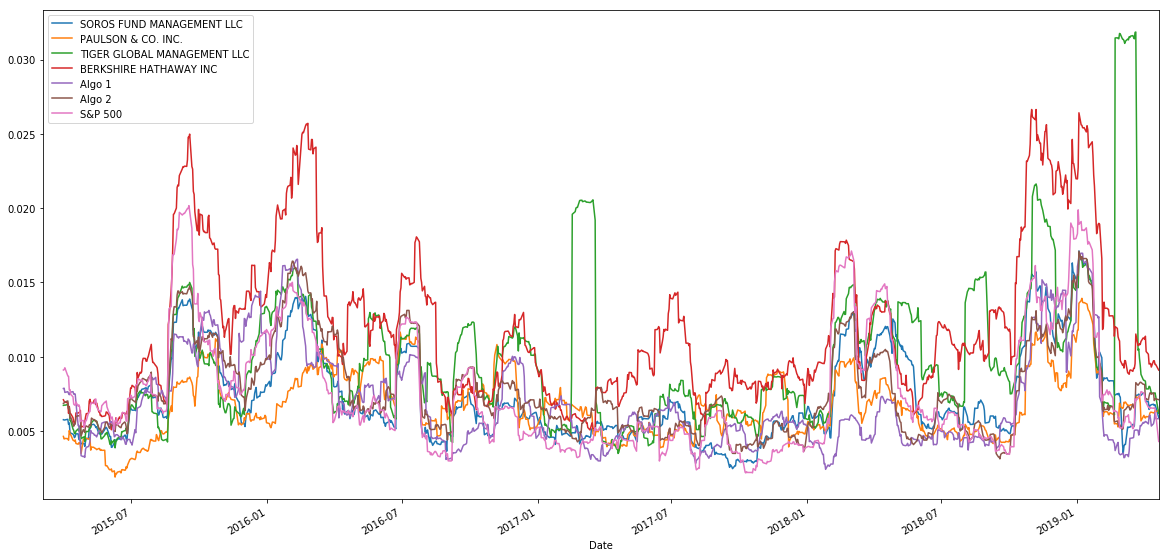

In [21]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
# YOUR CODE HERE

concat_chart = concat_returns_df.rolling(window=21).std().plot(figsize=(20,10))

concat_chart.legend(['SOROS FUND MANAGEMENT LLC', 
            'PAULSON & CO. INC.', 
            'TIGER GLOBAL MANAGEMENT LLC', 
            'BERKSHIRE HATHAWAY INC',
            'Algo 1',
            'Algo 2',
            'S&P 500'])

Does risk increase for each of the portfolios at the same time risk increases in the S&P?

For the most part, yes, the portfolio's risk does increase at around the same time it increases for
the S&P 500, with a couple of exceptions. The most obvious being the two times Tiger Global Management LLC
rises in early-to-mid 2017 and early-to-mid 2019.

In [22]:
# Correlation
# YOUR CODE HERE
concat_returns_df.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


Which returns most closely mimic the S&P?

The portfolio that most closely mimics the S&P 500 is Paulson & Co. Inc with a correlation of 0.013549.
However, it is important to note that Algo 1 is the strongest inverse correlation at -0.033963.

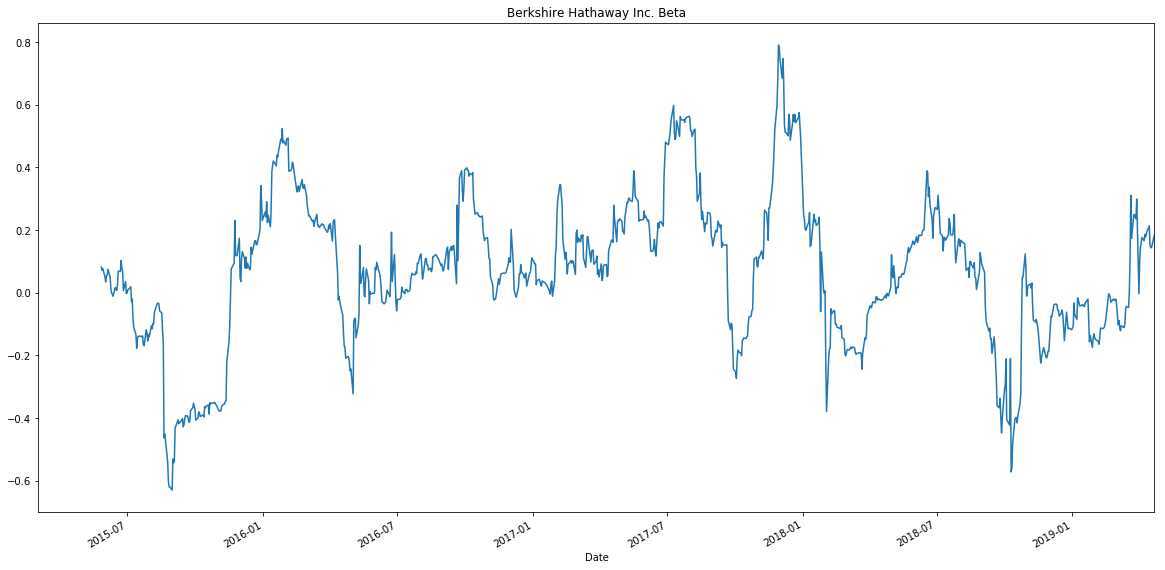

In [23]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# YOUR CODE HERE

rolling_covariance = concat_returns_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(concat_returns_df['S&P 500'])
rolling_variance = concat_returns_df['S&P 500'].rolling(window=60).var()
berkshire_rolling_beta = rolling_covariance / rolling_variance

berkshire_rolling_beta.plot(figsize=(20, 10), title='Berkshire Hathaway Inc. Beta')

Does the Berkshire Hathaway portfolio seem sensitive to movements in the S&P 500?

The portfolio essentially follows the market, but I wouldn't say it's "sensitive" because the beta neither hits 1.0
nor -1.0.

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [ ]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [24]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = (concat_returns_df.mean() * 252) / (concat_returns_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

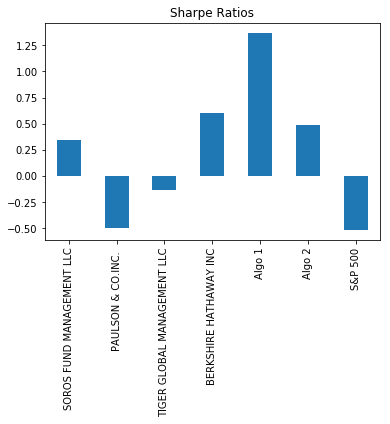

In [25]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot(kind='bar',title='Sharpe Ratios')

Do our algo strategies outperform both 'the market' and the whales?

Algo 1 does have the best performance when considering the Sharpe ratio, but algo 2 is beaten by Berkshire Hathaway's
portfolio.

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [26]:
# Read the first stock
# YOUR CODE HERE
tsla_csv = Path('../Resources/tsla_historical.csv')
tsla_df = pd.read_csv(tsla_csv,index_col='Trade DATE',parse_dates=True,infer_datetime_format=True)
tsla_df.head()

,Symbol,NOCP
Trade DATE,,
2019-08-22,TSLA,222.15
2019-08-21,TSLA,220.83
2019-08-20,TSLA,225.86
2019-08-19,TSLA,226.83
2019-08-16,TSLA,219.94


In [27]:
# Read the second stock
# YOUR CODE HERE
amzn_csv = Path('../Resources/amzn_historical.csv')
amzn_df = pd.read_csv(amzn_csv,index_col='Trade DATE',parse_dates=True,infer_datetime_format=True)
amzn_df.head()

,Symbol,NOCP
Trade DATE,,
2019-08-22,AMZN,1805.60
2019-08-21,AMZN,1823.54
2019-08-20,AMZN,1801.38
2019-08-19,AMZN,1816.12
2019-08-16,AMZN,1792.57


In [28]:
# Read the third stock
# YOUR CODE HERE
fb_csv = Path('../Resources/fb_historical.csv')
fb_df = pd.read_csv(fb_csv,index_col='Trade DATE',parse_dates=True,infer_datetime_format=True)
fb_df.head()

,Symbol,NOCP
Trade DATE,,
2019-08-22,FB,182.04
2019-08-21,FB,183.55
2019-08-20,FB,183.81
2019-08-19,FB,186.17
2019-08-16,FB,183.70


In [29]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
my_portfolio_df = pd.concat([tsla_df,amzn_df,fb_df])
my_portfolio_df.sample(5)

,Symbol,NOCP
Trade DATE,,
2019-04-15,FB,179.65
2019-08-19,FB,186.17
2018-09-24,AMZN,1934.36
2019-08-12,TSLA,229.01
2019-05-22,TSLA,192.73


In [30]:
# Reset the index
# YOUR CODE HERE
my_portfolio_df = my_portfolio_df.reset_index()
my_portfolio_df.head()

,Trade DATE,Symbol,NOCP
0,2019-08-22,TSLA,222.15
1,2019-08-21,TSLA,220.83
2,2019-08-20,TSLA,225.86
3,2019-08-19,TSLA,226.83
4,2019-08-16,TSLA,219.94


In [31]:
# Pivot the Data so that the stock tickers are the columns, the dates are the index, and the 
# values are the closing prices
# YOUR CODE HERE
my_portfolio_df = my_portfolio_df.pivot_table(values='NOCP',index='Trade DATE',columns='Symbol')
my_portfolio_df.head()

Symbol,AMZN,FB,TSLA
Trade DATE,,,
2018-08-24,1905.39,174.645,322.82
2018-08-27,1927.68,177.460,319.27
2018-08-28,1932.82,176.260,311.86
2018-08-29,1998.10,175.900,305.01
2018-08-30,2002.38,177.640,303.15


In [32]:
# Drop Nulls
# YOUR CODE HERE
my_portfolio_df = my_portfolio_df.dropna()
my_portfolio_df.head()

Symbol,AMZN,FB,TSLA
Trade DATE,,,
2018-08-24,1905.39,174.645,322.82
2018-08-27,1927.68,177.460,319.27
2018-08-28,1932.82,176.260,311.86
2018-08-29,1998.10,175.900,305.01
2018-08-30,2002.38,177.640,303.15


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [33]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE

my_daily_returns = my_portfolio_df.pct_change()
my_portfolio_returns = my_daily_returns.dot(weights)
my_portfolio_returns = my_portfolio_returns.dropna()
my_portfolio_returns.head()

Trade DATE
2018-08-27    0.005607
2018-08-28   -0.009102
2018-08-29    0.003256
2018-08-30    0.001979
2018-08-31   -0.003503
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [34]:
# YOUR CODE HERE
all_concat_returns_df = pd.concat([concat_returns_df,my_portfolio_returns],axis='columns')

all_concat_returns_df = all_concat_returns_df.rename(columns={
    0 : 'Custom',
})

all_concat_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,NaN


In [35]:
# Only compare dates where the new, custom portfolio has dates
# YOUR CODE HERE
all_dated_concat_returns_df = pd.concat([concat_returns_df,my_portfolio_returns],axis='columns',join='inner')

all_dated_concat_returns_df = all_dated_concat_returns_df.rename(columns={
    0 : 'Custom',
})

all_dated_concat_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
2018-08-27,0.005238,0.001996,0.008639,0.019590,-0.000678,0.001447,-0.000269,0.005607
2018-08-28,0.000646,0.001236,-0.006537,-0.005677,-0.004257,0.000831,-0.005669,-0.009102
2018-08-29,0.003578,0.002776,0.006234,0.001879,-0.002434,0.003543,0.004450,0.003256
2018-08-30,-0.007328,-0.001927,-0.016174,-0.013139,-0.002636,-0.001224,-0.000134,0.001979
2018-08-31,0.003072,0.000752,0.003118,-0.000410,0.004277,0.004151,0.001657,-0.003503


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [36]:
# Risk
# YOUR CODE HERE
all_concat_returns_std = all_dated_concat_returns_df.std()
all_volatility = all_concat_returns_std * np.sqrt(252)
all_volatility

SOROS FUND MANAGEMENT LLC      0.165576
PAULSON & CO.INC.              0.130850
TIGER GLOBAL MANAGEMENT LLC    0.257016
BERKSHIRE HATHAWAY INC         0.277345
Algo 1                         0.153611
Algo 2                         0.157187
S&P 500                        0.174186
Custom                         0.345280
dtype: float64

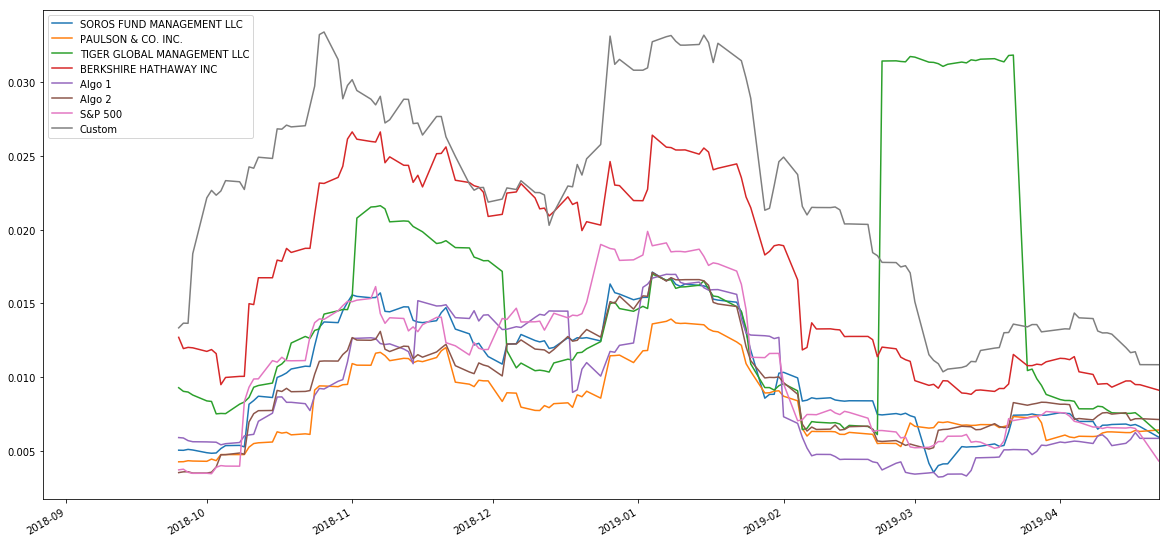

In [37]:
# Rolling
# YOUR CODE HERE
concat_chart = all_dated_concat_returns_df.rolling(window=21).std().plot(figsize=(20,10))

concat_chart.legend(['SOROS FUND MANAGEMENT LLC', 
            'PAULSON & CO. INC.', 
            'TIGER GLOBAL MANAGEMENT LLC', 
            'BERKSHIRE HATHAWAY INC',
            'Algo 1',
            'Algo 2',
            'S&P 500',
            'Custom'])

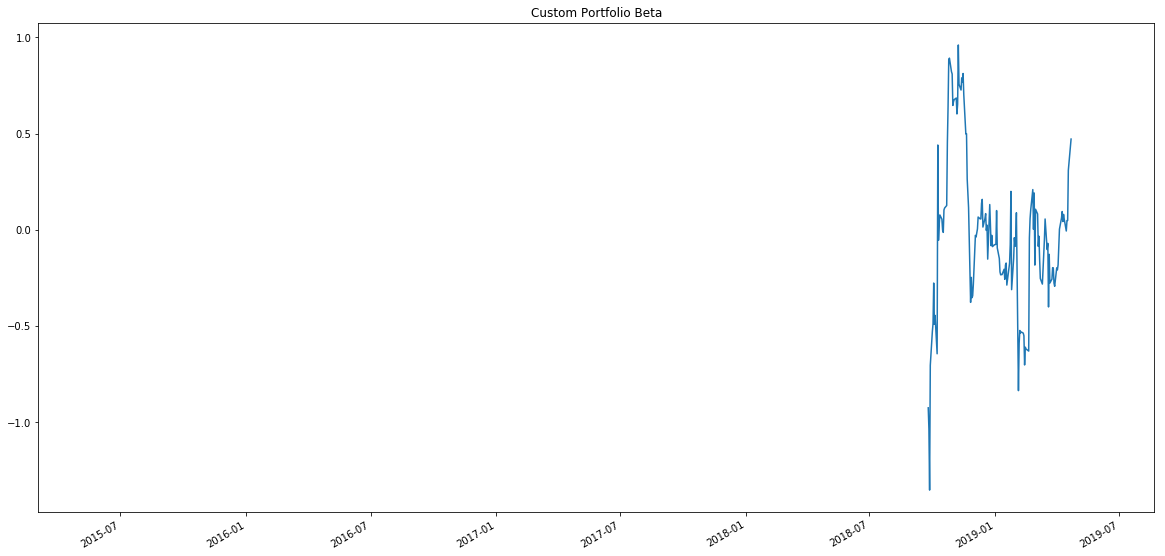

In [38]:
# Beta
# YOUR CODE HERE

rolling_covariance = all_dated_concat_returns_df['Custom'].rolling(window=21).cov(all_concat_returns_df['S&P 500'])
rolling_variance = all_dated_concat_returns_df['S&P 500'].rolling(window=21).var()
custom_rolling_beta = rolling_covariance / rolling_variance

custom_rolling_beta.plot(figsize=(20, 10), title='Custom Portfolio Beta')

In [39]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE
all_sharpe_ratios = (all_dated_concat_returns_df.mean() * 252) / (all_dated_concat_returns_df.std() * np.sqrt(252))
all_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286316
PAULSON & CO.INC.             -0.434123
TIGER GLOBAL MANAGEMENT LLC   -1.619203
BERKSHIRE HATHAWAY INC         0.273177
Algo 1                         2.509264
Algo 2                        -0.304183
S&P 500                       -0.025968
Custom                         0.049796
dtype: float64

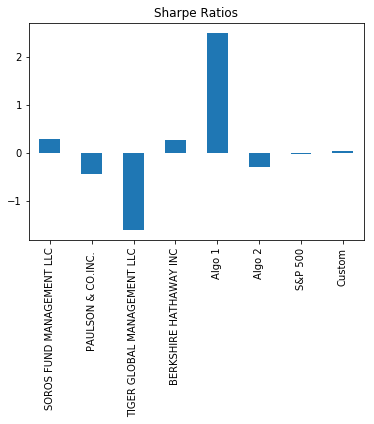

In [40]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
all_sharpe_ratios.plot(kind='bar',title='Sharpe Ratios')

## Include correlation analysis to determine which stocks (if any) are correlated

In [41]:
# YOUR CODE HERE
all_dated_concat_returns_df.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.813763,0.488480,0.842064,0.378617,0.878335,-0.061281,0.691559
PAULSON & CO.INC.,0.813763,1.000000,0.481731,0.688898,0.428081,0.816410,-0.083011,0.569507
TIGER GLOBAL MANAGEMENT LLC,0.488480,0.481731,1.000000,0.349570,0.163783,0.401210,-0.012318,0.321422
BERKSHIRE HATHAWAY INC,0.842064,0.688898,0.349570,1.000000,0.377812,0.803449,-0.054082,0.773179
Algo 1,0.378617,0.428081,0.163783,0.377812,1.000000,0.428915,-0.053845,0.306003
Algo 2,0.878335,0.816410,0.401210,0.803449,0.428915,1.000000,-0.080035,0.666076
S&P 500,-0.061281,-0.083011,-0.012318,-0.054082,-0.053845,-0.080035,1.000000,0.023335
Custom,0.691559,0.569507,0.321422,0.773179,0.306003,0.666076,0.023335,1.000000


How does your portfolio fair?

My portfolio does not perform very well in comparison to the others or the S&P 500. It is the riskiest portfolio,
has the lowest Sharpe ratio, and has a very strong positive correlation with the other portfolios.